# House Prices - Advanced Regression Techniques
## Predict sales prices and practice feature engineering, RFs, and gradient boosting

# 1. Introduction



Welcome to my Jupyter notebook for the Kaggle competition "House Prices - Advanced Regression Techniques". In this competition, the goal is to predict the sale prices of homes based on a variety of features. This project provides an opportunity to practice advanced regression techniques, feature engineering, and model evaluation.

### Objective

The objective of this competition is to develop a regression model that accurately predicts the sale prices of houses. To achieve this, we'll perform exploratory data analysis, preprocess the dataset, engineer relevant features, train various regression models, and evaluate their performace.

### Dataset Overview

The dataset provided for this competition contains information about various attributes of residential homes. It includes features such as square footage, number of bedrooms, location, and more. Additionally, the dataset contains the target variable, which is the sale price of eac house.

### Tools and Libraries Used

- Python
- Pandas for data manipulation
- Matplotlib and Seaborn for data visualization
- Scikit-learn for model building and evaluation

Now, let's start by loading and exploring the dataset to gain a better understanding of the features and their relationships with the target variable.


# 2. Data Exploration and Preprocessing

## Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df_train = pd.read_csv('data_downloaded/train.csv')
df_test = pd.read_csv('data_downloaded/test.csv')

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [4]:
df_merge = pd.concat([df_train, df_test], ignore_index=True)
print(df_merge.shape)

(2919, 81)


## Exploring the dataset

In [5]:
df_merge.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### Check for Missing Values

In [6]:
df_merge.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
WoodDeckSF          0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BedroomAbv

### For the sake of simplicity lets drop nan values having less than 25 values

In [7]:
# i want to drop nan values less then 25
def drop_nan_lessthen(df, nan_qty):
    '''
    we give a df and a quantity value (integer)
    it checks nan values for the df
    and drop the values less then this qty amount
    '''
    drop_columns = []
    nan_series = df.isnull().sum()
    for i,v in nan_series.iteritems():
        if v < nan_qty:
            drop_columns.append(i)
    df.dropna(subset=drop_columns, inplace=True)
    return df

In [8]:
df_merge = drop_nan_lessthen(df_merge, 25)

In [9]:
df_merge.shape

(2882, 81)

In [10]:
missing_values = df_merge.isnull().sum()[df_merge.isnull().sum().sort_values(ascending=False)>25].sort_values(ascending=False)
missing_values

PoolQC          2872
MiscFeature     2778
Alley           2687
Fence           2313
SalePrice       1431
FireplaceQu     1401
LotFrontage      478
GarageYrBlt      156
GarageFinish     156
GarageQual       156
GarageCond       156
GarageType       155
BsmtExposure      77
BsmtCond          77
BsmtQual          76
BsmtFinType2      75
BsmtFinType1      74
dtype: int64

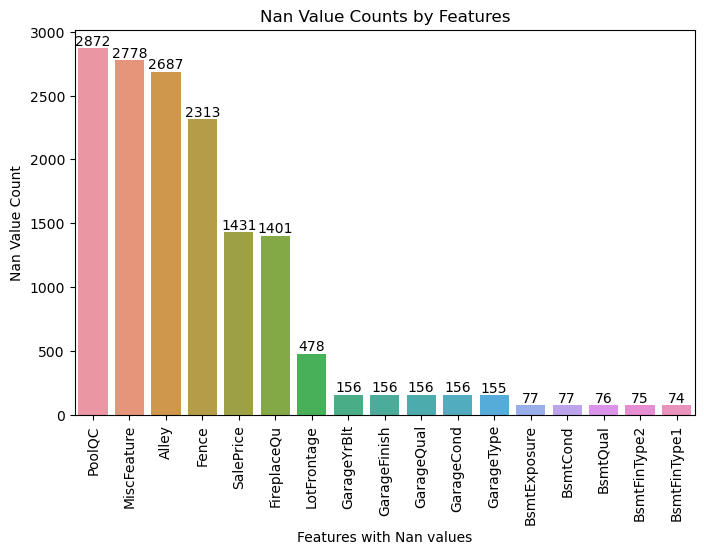

In [11]:
plt.figure(figsize=(8,5)) 
ax = sns.barplot(x=missing_values.index, y=missing_values.values)

plt.xticks(rotation=90)
plt.xlabel('Features with Nan values')
plt.ylabel('Nan Value Count')
plt.title('Nan Value Counts by Features')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

### Lets go column by column for NAN values

**NOTE: Not every nan value is missing value:**  
firstly we need to understand the real missing values, because some of Nan values in this dataset is not actually missing but only Nan sth like equals to 0**

In [12]:
replacement_dictionary = {
                            'PoolQC'      : 'No Pool',
                            'MiscFeature' : 'No MiscFeatures',  
                            'Alley'       : 'No Alley Access',
                            'Fence'       : 'No Fence',
                            'FireplaceQu' : 'No FirePlace', 
                            'GarageFinish': 'No Garage',
                            'GarageQual'  : 'No Garage',
                            'GarageCond'  : 'No Garage',
                            'GarageType'  : 'No Garage',
                            'BsmtExposure': 'No Basement',
                            'BsmtCond'    : 'No Basement',
                            'BsmtQual'    : 'No Basement',
                            'BsmtFinType2': 'No Basement',
                            'BsmtFinType1': 'No Basement'
}

In [13]:
replacement_columns = list(replacement_dictionary.keys())
replacement_columns

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'GarageType',
 'BsmtExposure',
 'BsmtCond',
 'BsmtQual',
 'BsmtFinType2',
 'BsmtFinType1']

In [14]:
for col in replacement_columns:
    df_merge[col].fillna(replacement_dictionary[col], inplace=True)

In [15]:
# lets check an example filled Nan value
df_merge['Fence'].value_counts()

No Fence    2313
MnPrv        327
GdPrv        118
GdWo         112
MnWw          12
Name: Fence, dtype: int64

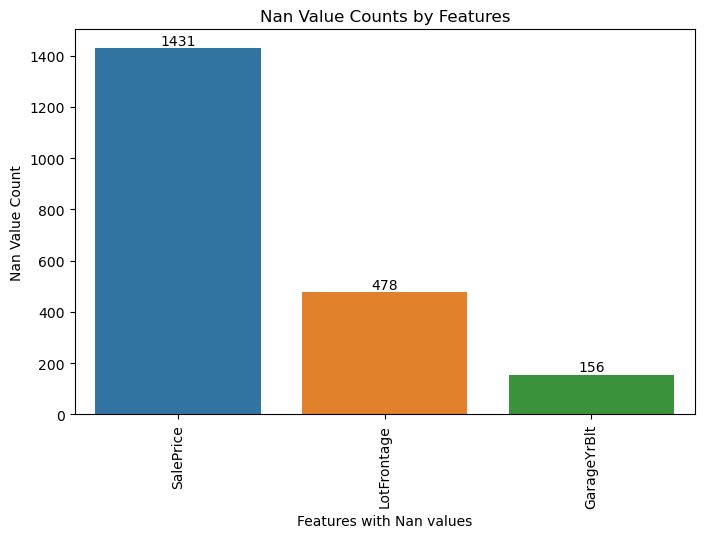

In [16]:
# lets check nan values now again:

missing_values_new = df_merge.isnull().sum()[df_merge.isnull().sum().sort_values(ascending=False)>25].sort_values(ascending=False)

plt.figure(figsize=(8,5)) 
ax = sns.barplot(x=missing_values_new.index, y=missing_values_new.values)

plt.xticks(rotation=90)
plt.xlabel('Features with Nan values')
plt.ylabel('Nan Value Count')
plt.title('Nan Value Counts by Features')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


In [17]:
df_train['SalePrice'].isnull().sum()

0

**that means all nan values in the sales price target is coming from df_test data which is very normal**

In [18]:
lot_front_mean = df_merge['LotFrontage'].mean()
df_merge['LotFrontage'].fillna(lot_front_mean, inplace=True)

**we can fill garage year built with building year built**

In [19]:
df_merge['GarageYrBlt'].corr(df_merge['YearBuilt'])

0.8418914005786091

In [20]:
df_merge['GarageYrBlt'].fillna(df_merge['YearBuilt'], inplace=True)

In [21]:
df_merge['GarageYrBlt'].corr(df_merge['YearBuilt'])

0.8590579529504343

In [22]:
df_merge.isnull().sum().nlargest(3)

SalePrice     1431
Id               0
MSSubClass       0
dtype: int64

## Feature Engineering Continued after handling NAN values

In [23]:
df_merge.shape

(2882, 81)

### Creating new Features and drop old ones

Combining features to create new ones is a powerful technique. For example, combining area measurements to get a "Total Area" feature can often provide more meaningful information. We will also use our Domain Knowledge as well

__Total Area__  
We will combine features named TotalBsmtSF (total basement square footage), 1stFlrSF (first floor square footage), and 2ndFlrSF (second floor square footage) to create a 'Total Area' feature.  

- Maybe we can try to add basement sq footage with multiplying 0.5 since the basement is not as valuable as ground level footage

In [24]:
df_merge['Total_Area'] = df_merge['TotalBsmtSF'] + df_merge['1stFlrSF'] + df_merge['2ndFlrSF']
df_merge[['Total_Area', 'TotalBsmtSF',  '1stFlrSF', '2ndFlrSF']].head(3)

,Total_Area,TotalBsmtSF,1stFlrSF,2ndFlrSF
0,2566.0,856.0,856,854
1,2524.0,1262.0,1262,0
2,2706.0,920.0,920,866


In [25]:
# Lets drop remainin columns
# i will drop TotalBsmtSF column later, because i will need bsmt sf down when i deal with features related to basement
df_merge.drop(columns=['1stFlrSF', '2ndFlrSF'], inplace=True)

In [26]:
df_merge.shape

(2882, 80)

__Total Bathrooms__

Like in sq footage we will combine the bathrooms into a total bathroom quantity.

In [27]:
bathroom_columns = [col for col in df_merge.columns if 'bath' in col.lower()]
bathroom_columns

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

In [28]:
df_merge['Total_Bathrooms'] = df_merge['BsmtFullBath'] + df_merge['FullBath'] + 0.5*(df_merge['BsmtHalfBath'] + df_merge['HalfBath'])

In [29]:
df_merge[['Total_Bathrooms', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].head(3)

,Total_Bathrooms,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,3.5,1.0,0.0,2,1
1,2.5,0.0,1.0,2,0
2,3.5,1.0,0.0,2,1


In [30]:
df_merge.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True)

__Age of the house__

i think the age of sth is more intuitive and comparable rather than the build year sth like 1995

In [31]:
newest_blt = df_merge['YearBuilt'].max()
newest_blt

2010

In [32]:
df_merge['Age_of_Property'] = newest_blt - df_merge['YearBuilt']

In [33]:
df_merge[['Age_of_Property', 'YearBuilt']].head(3)

,Age_of_Property,YearBuilt
0,7,2003
1,34,1976
2,9,2001


In [34]:
df_merge.drop(columns=['YearBuilt'], inplace=True)

__Renovation Adding Date__

In [35]:
df_merge['Age_of_Renovation'] = newest_blt - df_merge['YearRemodAdd']

In [36]:
df_merge[['Age_of_Renovation', 'YearRemodAdd']].head(3)

,Age_of_Renovation,YearRemodAdd
0,7,2003
1,34,1976
2,8,2002


In [37]:
df_merge.drop(columns = ['YearRemodAdd'], inplace=True)

__Garage Columns__

In [38]:
garage_columns = [col for col in df_merge.columns if 'garage' in col.lower()]
garage_columns

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

I want to hold GarageArea column, and create a binary value column indicating the property has a garage or not.  
i will drop other columns  
this is an approach coming from domain knowledge but also for simplicity  
Later on, we can tune the model with more features

In [39]:
df_merge['GarageType'].value_counts()

Attchd       1698
Detchd        773
BuiltIn       182
No Garage     155
Basment        36
2Types         23
CarPort        15
Name: GarageType, dtype: int64

In [40]:
df_merge['HasGarage'] = (df_merge['GarageType'] != 'No Garage').astype(int)
df_merge[['HasGarage', 'GarageType']].sample(5)

,HasGarage,GarageType
938,1,Attchd
2888,0,No Garage
2773,1,Detchd
290,1,Attchd
488,1,Attchd


In [41]:
df_merge.drop(columns= ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageQual','GarageCond'], inplace=True)

In [42]:
garage_columns_final = [col for col in df_merge.columns if 'garage' in col.lower()]
garage_columns_final

['GarageArea', 'HasGarage']

__Pool Column__

Lets also change the pool columns into a one binary feature as well, indicating whether the property has a pool or not  
['PoolArea', 'PoolQC']

In [43]:
df_merge['PoolQC'].value_counts()

No Pool    2872
Ex            4
Gd            4
Fa            2
Name: PoolQC, dtype: int64

In [44]:
df_merge['HasPool'] = (df_merge['PoolQC'] != 'No Pool').astype(int)

In [45]:
df_merge['HasPool'].value_counts()

0    2872
1      10
Name: HasPool, dtype: int64

In [46]:
df_merge.drop(columns =['PoolArea', 'PoolQC'], inplace=True)

__Neighborhood__

I want to create mean and median prices for each neighborhood and drop neighborhoods itself  
Because generally, prices are really dependent on the neighborhood  
We can also work with sqft prices as well

**Lets check test and train data are having the same neighborhoods** Because we will work with the prices

In [47]:
set_n_train = set(df_train['Neighborhood'])
set_n_test = set(df_test['Neighborhood'])

In [48]:
set_n_test == set_n_train

True

In [49]:
neighborhood_avg_price = df_train.groupby('Neighborhood')['SalePrice'].mean().reset_index()
neighborhood_avg_price.columns = ['Neighborhood', 'AvgHousePrice']

neighborhood_median_price = df_train.groupby('Neighborhood')['SalePrice'].median().reset_index()
neighborhood_median_price.columns = ['Neighborhood', 'MedianHousePrice']

In [50]:
df_merge = pd.merge(df_merge, neighborhood_avg_price, on='Neighborhood', how='left')
df_merge = pd.merge(df_merge, neighborhood_median_price, on='Neighborhood', how='left')

In [51]:
df_merge[['Neighborhood', 'AvgHousePrice', 'MedianHousePrice']].sample(3)

,Neighborhood,AvgHousePrice,MedianHousePrice
2500,CollgCr,197965.773333,197200.0
2192,IDOTRR,100123.783784,103000.0
2797,CollgCr,197965.773333,197200.0


In [52]:
# Lets double check what we have made
print(df_merge.groupby('Neighborhood')['SalePrice'].mean().loc['NAmes'])
print(df_merge.groupby('Neighborhood')['SalePrice'].median().loc['NAmes'])

145847.08
140000.0


In [53]:
df_merge.drop(columns=['Neighborhood'], inplace=True)

In [54]:
df_merge.shape

(2882, 72)

__Basement columns__

There are many features related to basement. Lets try to combine, elminate or summmarize them

In [55]:
basement_columns_initial = [col for col in df_merge.columns if 'bsmt' in col.lower()]
basement_columns_initial

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF']

- I will give grades to Basement Quality, Basement Condition, Basement Exposure
- I will combine Basement finTypes and SF into one feature having a grade
- Then i will combine all 4 features into one feature Ovarall Basement Quality with a total grade
- if the grade is zero - that means no basement/ but we need to check all the columns have synchronized no basement values or not
- i will drop the remaining

In [56]:
# Define different mappings for each basement featuresbsmt_qual_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Basement': 0}
bsmt_cond_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0}
bsmt_exposure_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Basement': 0}
bsmt_fintype_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'No Basement': 0}


In [57]:
# FIRST: lest check what our data looks like for fintype columns

df_merge[['BsmtQual','BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].sample(5)

,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2848,TA,Unf,0.0,Unf,0.0,697.0,697.0
1375,TA,Rec,204.0,Unf,0.0,356.0,560.0
1627,Gd,Unf,0.0,Unf,0.0,832.0,832.0
2175,TA,ALQ,224.0,Unf,0.0,725.0,949.0
714,Gd,BLQ,1084.0,Unf,0.0,92.0,1176.0


it looks like BsmtFinSF1+BsmtFinSF2+BsmtUnfSF == TotalBsmtSF  
if type1 and type2 has unf category, the sf writes in the BsmtUnfSF	

In [58]:
# lets double check if we are right with our assumptions related to categories and sq footages calculations

check_bsmt_sf = df_merge['TotalBsmtSF'] == (df_merge['BsmtFinSF1'] + df_merge['BsmtFinSF2'] + df_merge['BsmtUnfSF'])
check_bsmt_sf.value_counts()

# if all values come true, that means my hypotesis above is correct

True    2882
dtype: int64

**I am thinking to make a combined Basement Finishing Type Feature.**  
- Firstly, we will map the string categories into grades in BsmtFinType1 and BsmtFinType2
- Secondly, We will normalize BsmtFinSF1, BsmtFinSF2, BsmtUnfSF because all totally makes TotalBsmtSF
- Thirdly, SF1 * TYPE1_GRADE + SF2 * TYPE2_GRADE + SF3 * 1 (1 is the grade score of unf category)
- Actually BsmtUnfSF column is a seperated value from other columns because the other two columns have unf categories as well
-  For example, if BsmtFinType2 == Unf normally we are expecting BsmtFinSF2 have a float value. But in our dataset it comes 0.0 and the value is coming with a seperate column named BsmtUnfSF. So we assume that they are iconic 

In [59]:
# Convert the categorical str values into grade points by mapping function

df_merge['BsmtFinType1'] = df_merge['BsmtFinType1'].map(bsmt_fintype_mapping)
df_merge['BsmtFinType2'] = df_merge['BsmtFinType2'].map(bsmt_fintype_mapping)

In [60]:
df_merge['BsmtFinGrade'] = (df_merge['BsmtFinType1'] * df_merge.BsmtFinSF1 / df_merge.TotalBsmtSF) + \
                            (df_merge['BsmtFinType2'] * df_merge.BsmtFinSF2 / df_merge.TotalBsmtSF) + \
                            (df_merge['BsmtFinType1'] * df_merge.BsmtUnfSF / df_merge.TotalBsmtSF)

In [61]:
# Because of zero division there will be Nan values where there are no basement, since TotalBsmtSf == 0

df_merge['BsmtFinGrade'].fillna(0.0, inplace=True)

**Lets Also map and convert other basement related categorical columns**

In [62]:
df_merge['BsmtQual'] = df_merge['BsmtQual'].map(bsmt_qual_mapping)
df_merge['BsmtCond'] = df_merge['BsmtCond'].map(bsmt_cond_mapping)
df_merge['BsmtExposure'] = df_merge['BsmtExposure'].map(bsmt_exposure_mapping)

No we can combine all grades into one SINGLE grade point

In [63]:
df_merge['BsmtOverallGrade'] = df_merge['BsmtQual'] + df_merge['BsmtCond'] + df_merge['BsmtExposure'] + df_merge['BsmtFinGrade']

In [64]:
# Lets check what we have made so far
df_merge[df_merge.columns[df_merge.columns.str.contains('Bsmt')]].sample(5)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFinGrade,BsmtOverallGrade
2272,4,3,1,1,0.0,1,0.0,1582.0,1582.0,1.0,9.0
1587,4,3,1,6,343.0,1,0.0,80.0,423.0,6.0,14.0
403,4,3,1,1,0.0,1,0.0,806.0,806.0,1.0,9.0
386,3,3,3,5,631.0,1,0.0,410.0,1041.0,5.0,14.0
1132,3,3,4,5,1567.0,1,0.0,0.0,1567.0,5.0,15.0


**Lets drop all unnecessary columns**

In [65]:
df_merge.drop(columns = ['BsmtQual', 'BsmtCond',	'BsmtExposure',	'BsmtFinType1',	'BsmtFinSF1',	'BsmtFinType2',	'BsmtFinSF2',	'BsmtUnfSF',	'BsmtFinGrade'], inplace=True)

In [66]:
# We can NOW also drop TotalBsmtSF because this value is already in the Total Sqf feature
df_merge.drop(columns = ['TotalBsmtSF'], inplace=True)

In [67]:
# here is the remaining two columns with some statistics
df_merge[df_merge.columns[df_merge.columns.str.contains('Bsmt')]].describe().T

,count,mean,std,min,25%,50%,75%,max
BsmtOverallGrade,2882.0,11.589596,3.525004,0.0,9.0,11.457062,14.0,19.0


### High and Low Cardinality

**High Cardinality:** High cardinality features (features with a large number of unique values) can sometimes introduce noise into the model. Dropping or encoding them appropriately can be a good strategy.

**Low Cardinality:** Low cardinality features with little variation may not contribute much information. We can Consider dropping or consolidating them.

In [68]:
df_merge.shape

(2882, 64)

In [69]:
pd.set_option('display.max_rows', None)
df_merge.nunique().sort_values(ascending=False)

Id                   2882
LotArea              1925
Total_Area           1484
GrLivArea            1282
SalePrice             657
GarageArea            601
MasVnrArea            444
WoodDeckSF            377
BsmtOverallGrade      359
OpenPorchSF           250
EnclosedPorch         182
LotFrontage           128
ScreenPorch           120
Age_of_Property       118
Age_of_Renovation      61
MiscVal                37
LowQualFinSF           35
3SsnPorch              31
MedianHousePrice       25
AvgHousePrice          25
MSSubClass             16
Exterior2nd            16
Exterior1st            15
TotRmsAbvGrd           14
MoSold                 12
Total_Bathrooms        11
OverallQual            10
SaleType                9
Condition1              9
OverallCond             9
RoofMatl                8
BedroomAbvGr            8
Condition2              8
HouseStyle              8
Functional              7
SaleCondition           6
Heating                 6
Foundation              6
RoofStyle   

**Firstly**, we need to drop ID column, because it has unique values and results in high cardinality  

In [70]:
df_merge.drop(columns=['Id'], inplace=True)

In [71]:
df_merge.describe(include='object').T

,count,unique,top,freq
MSZoning,2882,5,RL,2242
Street,2882,2,Pave,2871
Alley,2882,3,No Alley Access,2687
LotShape,2882,4,Reg,1838
LandContour,2882,4,Lvl,2589
Utilities,2882,2,AllPub,2881
LotConfig,2882,5,Inside,2108
LandSlope,2882,3,Gtl,2742
Condition1,2882,9,Norm,2484
Condition2,2882,8,Norm,2852


**Secondly,** 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'MiscFeature' columns has too low variations and resulting **Low Cardinalty**  
Therefore i consider to drop them

In [72]:
df_merge.drop(columns = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'MiscFeature'], inplace=True)

### Multicollinearity

**Identifying Correlated Features:** Identifying and addressing multicollinearity is crucial for regression models. Dropping one of a set of highly correlated features is a good strategy. It helps to keep the model more interpretable and efficient.  
**VIF (Variance Inflation Factor)**: If you want a more quantitative approach to assess multicollinearity, you can use VIF. A high VIF score indicates a high correlation between a feature and other features in the dataset.

Before diving into mathematical calculations, we can check any variables with our domain knowledge


'GrLivArea', 'TotRmsAbvGrd', 'Total_Area' are strongly correlated each other. I need to find a balance between dropping and holding  
I think Room Number is important along with Total Area  
So i can drop Living Area Above the Ground

In [73]:
df_merge.drop(columns=['GrLivArea'], inplace=True)

#### Correlation for Numeric VAlues

In [74]:
corr_matrix = df_merge.corr()[ (df_merge.corr()>np.abs(0.7))   &   (df_merge.corr()!=np.abs(1))  ]
corr_matrix.dropna(axis=1, how='all')

,OverallQual,SalePrice,Total_Area,AvgHousePrice,MedianHousePrice
MSSubClass,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,0.790085,NaN,0.704644,0.711435
OverallCond,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN
LowQualFinSF,NaN,NaN,NaN,NaN,NaN
BedroomAbvGr,NaN,NaN,NaN,NaN,NaN
KitchenAbvGr,NaN,NaN,NaN,NaN,NaN
TotRmsAbvGrd,NaN,NaN,NaN,NaN,NaN


Although it may be a descriptive approach to hold both Average and Median Prices for each neighborhood  
This approach also results in multicoliinearity  
i consider the balance is more weighted to the dropping Average price

In [75]:
df_merge.drop(columns= ['AvgHousePrice'], inplace=True)

#### Multicollinearity for Categorical (Object) Variables

In [76]:
df_merge.describe(include='object').T

,count,unique,top,freq
MSZoning,2882,5,RL,2242
Alley,2882,3,No Alley Access,2687
LotShape,2882,4,Reg,1838
LandContour,2882,4,Lvl,2589
LotConfig,2882,5,Inside,2108
LandSlope,2882,3,Gtl,2742
Condition1,2882,9,Norm,2484
BldgType,2882,5,1Fam,2390
HouseStyle,2882,8,1Story,1450
RoofStyle,2882,6,Gable,2281


**Cramér's V**   
I can investigate with my domain knowledge, but i will try to measure the dependencies with **Cramér's V**

Cramér's V is a suitable measure for associations between categorical variables. It provides a value between 0 and 1, where 0 indicates no association and 1 indicates a perfect association. This metric gives you a good sense of the strength of association between categorical variables.

In [77]:
categorical_variables = list(df_merge.columns[df_merge.dtypes == 'object'])
categorical_variables

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [78]:
from scipy.stats import chi2_contingency

cramer_v_dict = {}

for var1 in categorical_variables:
    for var2 in categorical_variables:
        if var1 != var2:
            contingency_table = pd.crosstab(df_merge[var1], df_merge[var2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            num_obs = contingency_table.sum().sum()
            v = np.sqrt(chi2 / (num_obs * (min(contingency_table.shape) - 1)))
            cramer_v_dict[(var1, var2)] = v

In [79]:
for i, v in cramer_v_dict.items():
    if v>0.4:
        print(i,v)

('MSZoning', 'Alley') 0.4194666581367363
('Alley', 'MSZoning') 0.4194666581367362
('LandContour', 'LandSlope') 0.43980958262951253
('LandSlope', 'LandContour') 0.43980958262951253
('Exterior1st', 'Exterior2nd') 0.7392909230451972
('Exterior2nd', 'Exterior1st') 0.7392909230451973
('ExterQual', 'KitchenQual') 0.5453474021344218
('KitchenQual', 'ExterQual') 0.5453474021344218
('SaleType', 'SaleCondition') 0.47161457712203103
('SaleCondition', 'SaleType') 0.471614577122031


Here is the measures i will take:
- I will not drop Alley or MSZoning, because i think they are not describing directly each other
- I will drop Landslope over LandContour, because contour has more descriptive data

In [80]:
df_merge.drop(columns=['LandSlope'], inplace=True)

In [81]:
len(df_merge[df_merge['Exterior1st'] != df_merge['Exterior2nd']])

428

- I will drop Exterior2nd, except 428 instances there are no value in Exterior 2nd. Even exist, its not as descriptive as it harms model by multicollinearity

In [82]:
df_merge.drop(columns=['Exterior2nd'], inplace=True)

* i will drop SaleType over SaleCondition. because it is less descriptive and also it's data is somehow described in other columns as well

In [83]:
df_merge.drop(columns=['SaleType'], inplace=True)

* I will drop ExterQual ove KitchenQual.
* ExterQual somehow is reflected in External material, age, renovation age

In [84]:
df_merge.drop(columns=['ExterQual'], inplace=True)

### Feature Engineering Continued

In [85]:
df_merge.shape

(2882, 51)

In [86]:
df_merge.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir',
       'Electrical', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition', 'SalePrice', 'Total_Area',
       'Total_Bathrooms', 'Age_of_Property', 'Age_of_Renovation', 'HasGarage',
       'HasPool', 'MedianHousePrice', 'BsmtOverallGrade'],
      dtype='object')

**Rooms**

In [87]:
# no need to hold both TotRmsAbvGrd and 'BedroomAbvGr'
df_merge.drop(columns = ['BedroomAbvGr'], inplace=True)

**Porch and Deck Columns**

'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'  
i will combine these features into one single one

In [88]:
terrace_columns = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
terrace_weights = [1, 1, 2, 2, 2]

df_merge['Terrace_Grade'] = (df_merge[terrace_columns[0]] * terrace_weights[0] +
                            df_merge[terrace_columns[1]] * terrace_weights[1] +
                             df_merge[terrace_columns[2]] * terrace_weights[2] +
                             df_merge[terrace_columns[3]] * terrace_weights[3] +
                             df_merge[terrace_columns[4]] * terrace_weights[4])

In [89]:
df_merge.drop(columns=terrace_columns, inplace=True)

## Final Issues Feature Engineering

**this part is the version0.1 of the model with limited features selected by domain knowledge and dataset information**

In [90]:
df_merge.shape

(2882, 46)

For the sake of simplicity i will only select some of the features for the first run of model  
Later on, i will come to this part and continue with 46 features again. And make a comparison

In [91]:
df_merge.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir',
       'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageArea',
       'PavedDrive', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SaleCondition',
       'SalePrice', 'Total_Area', 'Total_Bathrooms', 'Age_of_Property',
       'Age_of_Renovation', 'HasGarage', 'HasPool', 'MedianHousePrice',
       'BsmtOverallGrade', 'Terrace_Grade'],
      dtype='object')

I will use domain knowledge and intuition from the dataset i gathered, and will drop more features. I want to have around 15-20 features to continue our model

In [92]:
columns_to_use_v1 = ['BsmtOverallGrade', 'Terrace_Grade', 'ExterCond', 'KitchenQual', 'OverallQual', 'OverallCond','LotArea', 
                     'Total_Area', 'Total_Bathrooms', 'GarageArea', 'TotRmsAbvGrd','Age_of_Property', 'Age_of_Renovation', 
                     'MoSold', 'YrSold', 'SaleCondition','MSZoning', 'MedianHousePrice', 'SalePrice', 'Condition1', 'HouseStyle']

In [93]:
columns_to_drop_v1 = [col for col in df_merge.columns if col not in columns_to_use_v1]
columns_to_drop_v1

['MSSubClass',
 'LotFrontage',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'BldgType',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'MasVnrArea',
 'Foundation',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'KitchenAbvGr',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'PavedDrive',
 'Fence',
 'MiscVal',
 'HasGarage',
 'HasPool']

In [94]:
df = df_merge.drop(columns=columns_to_drop_v1)

In [95]:
df.shape

(2882, 21)

In [96]:
df.sample(3)

,MSZoning,LotArea,Condition1,HouseStyle,OverallQual,OverallCond,ExterCond,KitchenQual,TotRmsAbvGrd,GarageArea,MoSold,YrSold,SaleCondition,SalePrice,Total_Area,Total_Bathrooms,Age_of_Property,Age_of_Renovation,MedianHousePrice,BsmtOverallGrade,Terrace_Grade
87,FV,3951,Norm,2Story,6,5,TA,Gd,4,528.0,6,2009,Partial,164500.0,1836.0,2.5,1,1,225500.0,11.0,234
2137,RL,14171,Norm,2Story,7,5,TA,Gd,9,453.0,12,2008,Normal,NaN,3012.0,2.5,17,16,179900.0,14.0,266
1130,RL,9600,Norm,1.5Fin,6,5,TA,TA,6,288.0,4,2008,Abnorml,119000.0,2284.0,1.0,60,60,140000.0,11.0,192


## Log Transformation of SalePrice

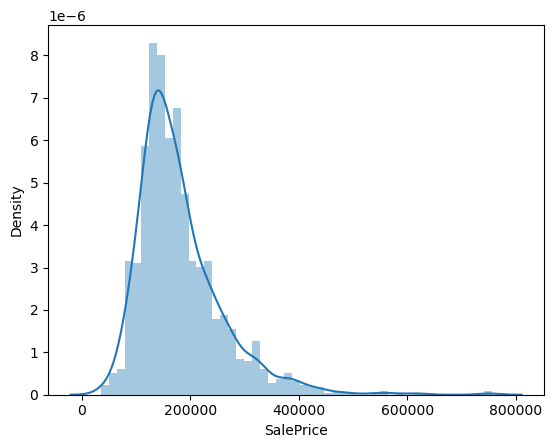

In [97]:
sns.distplot(df['SalePrice']);

Our SalePrices are highly right skewed so it will be a good idea to make log transformation

In [98]:
df['SalePrice'] = np.log1p(df['SalePrice'])

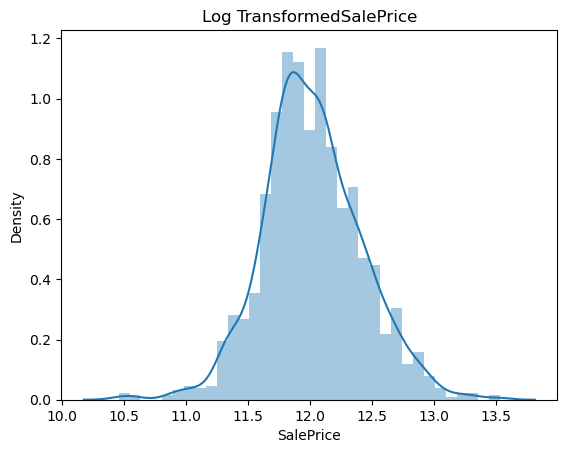

In [99]:
sns.distplot(df['SalePrice'])
plt.title('Log TransformedSalePrice');

In [101]:
df['SalePrice'].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## Encode categorical variables

### Nominal Categories

In [102]:
nominal_categories = ['MSZoning', 'Condition1', 'HouseStyle', 'SaleCondition']

In [103]:
df_encoded = pd.get_dummies(df[nominal_categories], columns=nominal_categories)

In [104]:
df.drop(columns=nominal_categories, inplace=True)

In [105]:
df = pd.concat([df, df_encoded], axis=1)

### Ordinal Categories

In [106]:
ordinal_categories = ['ExterCond',	'KitchenQual']

In [107]:
ordinal_mapping = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}

In [108]:
df['ExterCond'] = df['ExterCond'].map(ordinal_mapping)

In [109]:
df['KitchenQual'] = df['KitchenQual'].map(ordinal_mapping)

In [110]:
df.sample(3)

,LotArea,OverallQual,OverallCond,ExterCond,KitchenQual,TotRmsAbvGrd,GarageArea,MoSold,YrSold,SalePrice,Total_Area,Total_Bathrooms,Age_of_Property,Age_of_Renovation,MedianHousePrice,BsmtOverallGrade,Terrace_Grade,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1506,17360,6,6,4,3,6,470.0,1,2010,NaN,2338.0,2.0,61,60,140000.0,10.0,300,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2536,6221,5,5,3,3,5,528.0,10,2007,NaN,2083.0,2.0,69,60,200624.0,8.0,288,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1977,12460,7,5,3,3,8,400.0,5,2008,NaN,3359.0,2.5,11,10,181000.0,14.0,188,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## Scale or normalize numerical features

For regression tasks, it's generally a good practice to standardize the features rather than normalizing them.  
Standardization (or Z-score scaling) is often preferred because it centers the data around a mean of 0 and scales it based on the standard deviation.  
This can be particularly helpful for models like linear regression, support vector machines, and neural networks, as they often assume that the features are normally distributed.

In [111]:
# Before standardization lets seperate SalePrice, to avoid standa

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [113]:
df_standardized.sample(10)

,LotArea,OverallQual,OverallCond,ExterCond,KitchenQual,TotRmsAbvGrd,GarageArea,MoSold,YrSold,SalePrice,Total_Area,Total_Bathrooms,Age_of_Property,Age_of_Renovation,MedianHousePrice,BsmtOverallGrade,Terrace_Grade,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
2849,0.703687,-0.777338,1.289192,2.457682,-0.769387,1.621698,-0.607520,0.291925,-1.361870,NaN,1.163307,0.970628,0.701954,1.015809,0.478183,0.683920,0.751811,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,-1.006265,-0.05276,-0.089693,1.532080,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
2676,0.117950,1.363746,-0.521016,-0.238564,0.745212,1.621698,1.925325,1.400396,-1.361870,NaN,2.004542,1.589647,-0.688309,-0.422961,2.264391,1.818868,2.516708,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,-1.006265,-0.05276,-0.089693,1.532080,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
810,-0.045288,-0.063643,0.384088,-0.238564,-0.769387,0.348201,-0.797716,-0.816545,-0.602994,-0.131888,0.418994,-0.886431,0.437142,1.255604,-0.595285,-0.451027,1.537261,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,0.993774,-0.05276,-0.089693,-0.652707,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
2757,0.209107,-0.063643,1.289192,-0.238564,-0.769387,1.621698,-1.080689,-0.447055,-1.361870,NaN,0.159292,-1.505450,1.562592,-0.566838,-0.873284,-1.018501,-0.369584,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,-1.006265,-0.05276,-0.089693,1.532080,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
104,-0.300324,0.650051,-1.426120,-2.934811,-0.769387,0.348201,-1.080689,-0.077565,-0.602994,0.045622,0.386686,-0.886431,1.330882,1.639276,-1.250443,-0.734764,0.676105,-0.093544,-0.219089,-0.095413,-1.871664,2.303551,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,2.870049,-0.081464,-1.006265,-0.05276,-0.089693,-0.652707,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
415,-0.289313,-0.063643,1.289192,-0.238564,-0.769387,-0.288547,-0.152907,-1.186035,-1.361870,-0.268770,-0.589992,-0.886431,-0.224888,0.296424,-0.683820,0.116447,-1.065133,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,-1.006265,-0.05276,-0.089693,1.532080,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
2644,-0.056811,1.363746,-0.521016,-0.238564,0.745212,0.348201,1.911408,-1.555525,-1.361870,NaN,0.587986,1.589647,-0.886918,-0.662756,2.264391,0.683920,0.075189,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,-0.241643,0.400282,-0.083595,-0.117123,-0.099049,-0.128757,-0.045675,-0.05597,-0.348426,-0.081464,-1.006265,-0.05276,-0.089693,1.532080,-0.172202,-0.213819,-0.262662,-0.064662,-0.087706,-0.127358,0.458157,-0.297269
2124,0.358006,-0.777338,-1.426120,-0.238564,-0.769387,-0.288547,-0.338463,-1.925016,0.155883,NaN,-0.132718,-0.267411,1.694998,1.639276,-0.683820,-0.451027,0.732885,-0.093544,-0.219089,-0.095413,0.534284,-0.434112,-0.179541,4.138331,-2.498241,

In [114]:
#lets check if sth went wrong during many processes and have any null values apart from y_target
df_standardized.isnull().sum().sort_values(ascending=False)

SalePrice                1431
LotArea                     0
HouseStyle_2.5Fin           0
Condition1_PosA             0
Condition1_PosN             0
Condition1_RRAe             0
Condition1_RRAn             0
Condition1_RRNe             0
Condition1_RRNn             0
HouseStyle_1.5Fin           0
HouseStyle_1.5Unf           0
HouseStyle_1Story           0
HouseStyle_2.5Unf           0
Condition1_Feedr            0
HouseStyle_2Story           0
HouseStyle_SFoyer           0
HouseStyle_SLvl             0
SaleCondition_Abnorml       0
SaleCondition_AdjLand       0
SaleCondition_Alloca        0
SaleCondition_Family        0
SaleCondition_Normal        0
Condition1_Norm             0
Condition1_Artery           0
OverallQual                 0
Total_Bathrooms             0
OverallCond                 0
ExterCond                   0
KitchenQual                 0
TotRmsAbvGrd                0
GarageArea                  0
MoSold                      0
YrSold                      0
Total_Area

# 3. Data Splitting

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
# finding the split index. 
len_test  = df_standardized['SalePrice'].isnull().sum()
len_total = len(df_standardized)
split_index = len_total - len_test

In [117]:
split_index

1451

In [118]:
X_train = df_standardized.iloc[:split_index].drop(columns=['SalePrice'])
y_train = df_standardized.iloc[:split_index]['SalePrice']
X_test = df_standardized.iloc[split_index:].drop(columns=['SalePrice'])

In [126]:
print(len(X_train))
print(len(y_train))

1451
1451


In [119]:
y_train.tail()

1446    0.125581
1447    0.582112
1448    1.178729
1449   -0.395445
1450   -0.302494
Name: SalePrice, dtype: float64

# 4. Model Selection and Training

In [121]:
from sklearn.linear_model import LinearRegression

# Lets instantiate the model
model = LinearRegression()

In [122]:
# Lets train the model
model.fit(X_train, y_train)

LinearRegression()

In [123]:
# lets make predictions
y_pred = model.predict(X_test)

## Transform Back the predictions

In [128]:
scaler = StandardScaler()

In [136]:
# Reshape my predictions to a 2D array
y_pred_2d = y_pred.reshape(-1, 1)

# Lets now Fit the StandardScaler object to my predictions
scaler.fit(y_pred_2d)

StandardScaler()

In [138]:
predictions_standardized = scaler.inverse_transform(y_pred_2d)

In [142]:
predictions_standardized

array([[-0.83254285],
       [-0.13549919],
       [-0.10944148],
       ...,
       [-0.08183514],
       [-0.73482645],
       [ 0.49733084]])

In [143]:
predictions = np.exp(predictions_standardized[:, 0])

In [144]:
predictions

array([0.43494189, 0.87327987, 0.89633461, ..., 0.92142385, 0.47958868,
       1.64432644])

# 6. Model Evaluation

# 7. Hyperparameter Tuning (Optional)

# 8. Final Model Training and Predictions

# 9. Conclusion